<a href="https://colab.research.google.com/github/AkindeKadjo/Life_Expectancy_prediction/blob/main/Life_Expectancy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Akinde Kadjo

#Predicting Life Expectancy

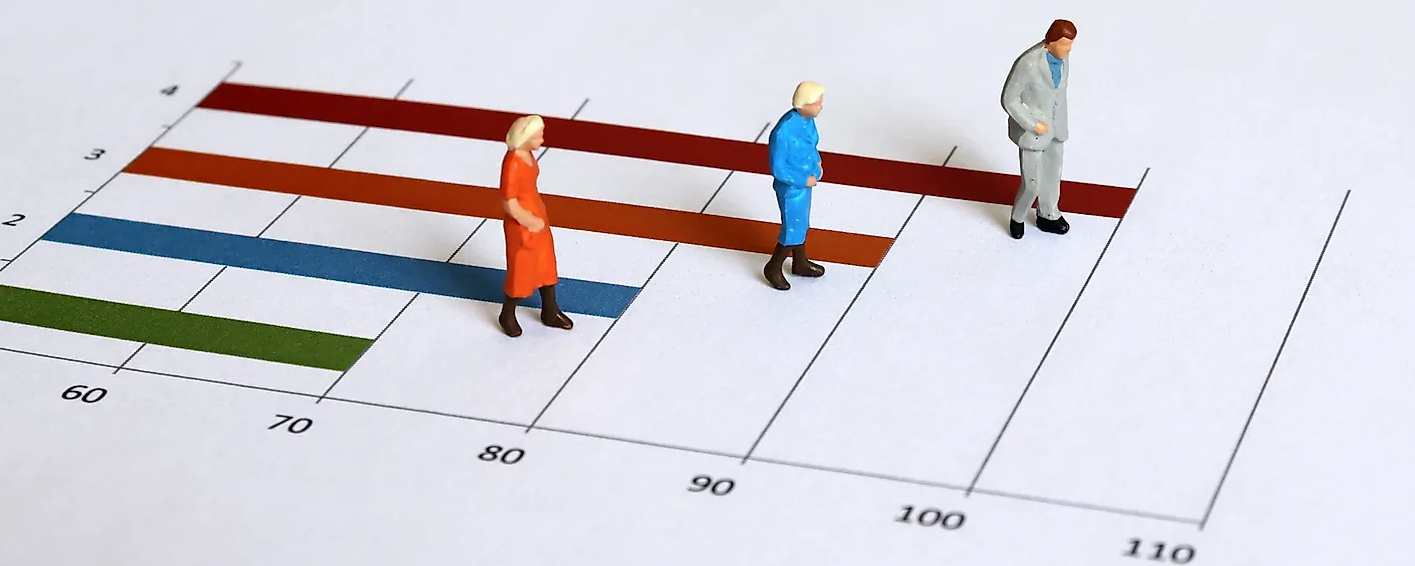

Image taken from [worldatlas.com](https://www.worldatlas.com/articles/countries-by-life-expectancy.html)

>>The Goal of this project is to have a better understanding of factors affecting Life expectancy throughout the world. The data was taken from [Kaggle](https://www.kaggle.com/kumarajarshi/life-expectancy-who) 



---



---



#Library Imports and Data Loading

In [9]:
#Importing all of the libraries that may be needed for the project
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder

from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn import set_config
set_config(display='diagram')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Loading the data
filename = '/content/drive/MyDrive/Job hunting project/Life Expectancy Data - Life Expectancy Data.csv'
Original_df = pd.read_csv(filename)
# keeping a copy of the df as a safety net
df = Original_df.copy()
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


A quick check for the data info is done to have an overall idea of the loaded data set

In [4]:
#checking for data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

>There doesn't seem to be any abnormalities when it comes to the data type. Inconsistencies will be investiguated further down this workbook.

#Data Cleaning

##Checking for missing values and duplicates

In [5]:
# how many data points are duplicated?
df.duplicated().sum()

0

In [6]:
#check for missing values
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

>The cell above shows that there are indeed missing values. These missing values won't be handled right now before splitting the data for machine learning as to avoid data leakage

##Addressing Data Inconcistencies

In [7]:
#Identifying and addressing any inconsistencies in categorical values
dtypes = df.dtypes
str_cols = dtypes[dtypes=='object'].index
for col in str_cols:
    print(f"- Column= {col}")
    print(df[col].value_counts(dropna=False))
    print('\n\n')

- Column= Country
Afghanistan              16
Peru                     16
Nicaragua                16
Niger                    16
Nigeria                  16
                         ..
Niue                      1
San Marino                1
Nauru                     1
Saint Kitts and Nevis     1
Dominica                  1
Name: Country, Length: 193, dtype: int64



- Column= Status
Developing    2426
Developed      512
Name: Status, dtype: int64





>There doesn't seem to be any miss entered data.

In [8]:
#checking for significant outliers for the numerical data
df.describe().round(2)

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.00,2928.00,2928.00,2938.00,2744.00,2938.00,2385.00,2938.00,2904.00,2938.00,2919.00,2712.00,2919.00,2938.00,2490.00,2.286000e+03,2904.00,2904.00,2771.00,2775.00
mean,2007.52,69.22,164.80,30.30,4.60,738.25,80.94,2419.59,38.32,42.04,82.55,5.94,82.32,1.74,7483.16,1.275338e+07,4.84,4.87,0.63,11.99
std,4.61,9.52,124.29,117.93,4.05,1987.91,25.07,11467.27,20.04,160.45,23.43,2.50,23.72,5.08,14270.17,6.101210e+07,4.42,4.51,0.21,3.36
min,2000.00,36.30,1.00,0.00,0.01,0.00,1.00,0.00,1.00,0.00,3.00,0.37,2.00,0.10,1.68,3.400000e+01,0.10,0.10,0.00,0.00
25%,2004.00,63.10,74.00,0.00,0.88,4.69,77.00,0.00,19.30,0.00,78.00,4.26,78.00,0.10,463.94,1.957932e+05,1.60,1.50,0.49,10.10
50%,2008.00,72.10,144.00,3.00,3.76,64.91,92.00,17.00,43.50,4.00,93.00,5.76,93.00,0.10,1766.95,1.386542e+06,3.30,3.30,0.68,12.30
75%,2012.00,75.70,228.00,22.00,7.70,441.53,97.00,360.25,56.20,28.00,97.00,7.49,97.00,0.80,5910.81,7.420359e+06,7.20,7.20,0.78,14.30
max,2015.00,89.00,723.00,1800.00,17.87,19479.91,99.00,212183.00,87.30,2500.00,99.00,17.60,99.00,50.60,119172.74,1.293859e+09,27.70,28.60,0.95,20.70


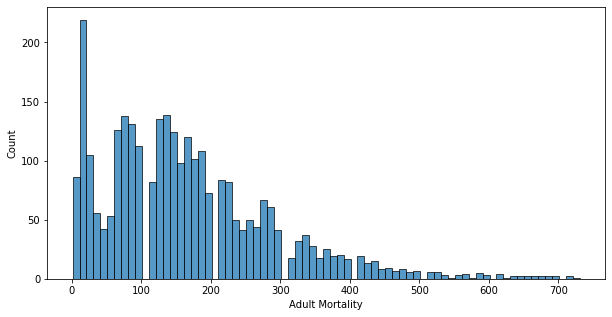

In [11]:
#The maximum mortality of 723 seems like an outlier. Let's take a quick look at the Adult mortality distribution 
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(data=df, x="Adult Mortality",binwidth=10);